In [39]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

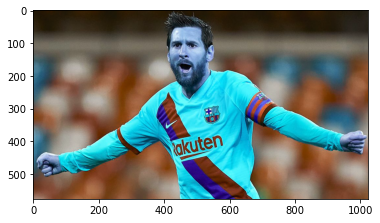

In [40]:
im_path = 'C:/Users/yeshu/Projects/SportsPersonClassifier/datasets/lionel_messi/_111066400_messi.jpg'
img1 = cv2.imdecode(np.fromfile(im_path, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
img1.shape
plt.imshow(img1)

(422, 759, 3)


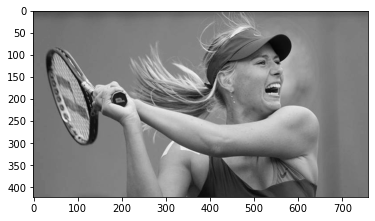

In [41]:
img_path = 'C:/Users/yeshu/Projects/SportsPersonClassifier/datasets/maria_sharapova/maria-sharapova (1).jpg'
img = cv2.imdecode(np.fromfile(img_path, dtype=np.uint8), cv2.IMREAD_UNCHANGED)

print(img.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

plt.imshow(gray, cmap='gray')

In [42]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img1, 1.3, 5)
faces

array([[394,  54, 138, 138]], dtype=int32)

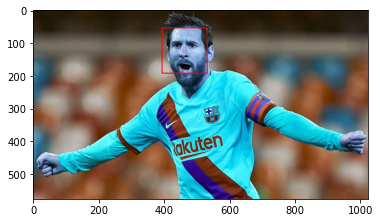

In [43]:
(x, y, w, h) = faces[0]
face_img = cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

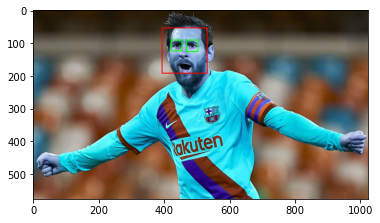

In [44]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    face_img = cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray1[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [45]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

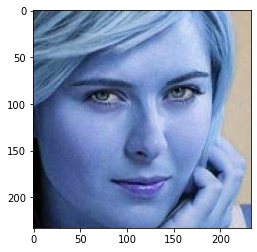

In [46]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

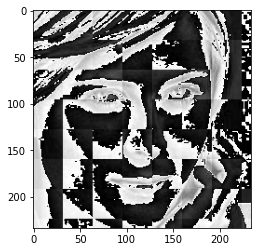

In [47]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [48]:
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./datasets/cropped',
 './datasets/lionel_messi',
 './datasets/maria_sharapova',
 './datasets/roger_federer',
 './datasets/serena_williams',
 './datasets/virat_kohli']

In [49]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [50]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./datasets/cropped/lionel_messi
Generating cropped images in folder:  ./datasets/cropped/maria_sharapova
Generating cropped images in folder:  ./datasets/cropped/roger_federer
Generating cropped images in folder:  ./datasets/cropped/serena_williams
Generating cropped images in folder:  ./datasets/cropped/virat_kohli


In [51]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./datasets/cropped/lionel_messi\\lionel_messi1.png',
  './datasets/cropped/lionel_messi\\lionel_messi10.png',
  './datasets/cropped/lionel_messi\\lionel_messi11.png',
  './datasets/cropped/lionel_messi\\lionel_messi13.png',
  './datasets/cropped/lionel_messi\\lionel_messi14.png',
  './datasets/cropped/lionel_messi\\lionel_messi15.png',
  './datasets/cropped/lionel_messi\\lionel_messi16.png',
  './datasets/cropped/lionel_messi\\lionel_messi17.png',
  './datasets/cropped/lionel_messi\\lionel_messi18.png',
  './datasets/cropped/lionel_messi\\lionel_messi19.png',
  './datasets/cropped/lionel_messi\\lionel_messi2.png',
  './datasets/cropped/lionel_messi\\lionel_messi20.png',
  './datasets/cropped/lionel_messi\\lionel_messi22.png',
  './datasets/cropped/lionel_messi\\lionel_messi23.png',
  './datasets/cropped/lionel_messi\\lionel_messi24.png',
  './datasets/cropped/lionel_messi\\lionel_messi25.png',
  './datasets/cropped/lionel_messi\\lionel_messi26.png',
  './datasets/cro

In [52]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict


{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [53]:
print(class_dict)

{'lionel_messi': 0, 'maria_sharapova': 1, 'roger_federer': 2, 'serena_williams': 3, 'virat_kohli': 4}


In [54]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [55]:
len(X)

160

In [56]:
len(X[0])

4096

In [57]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(160, 4096)

In [58]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.26, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7380952380952381

In [72]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       1.00      0.73      0.84        11
           2       0.83      0.71      0.77         7
           3       0.50      0.50      0.50         6
           4       0.67      1.00      0.80        10

    accuracy                           0.74        42
   macro avg       0.74      0.71      0.72        42
weighted avg       0.77      0.74      0.74        42



In [65]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [67]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [73]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.879710,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.701812,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.871377,{'logisticregression__C': 1}


In [75]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8333333333333334

In [82]:
best_clf = best_estimators['svm']


In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  2,  0],
       [ 0, 10,  1,  0,  0],
       [ 0,  0,  5,  2,  0],
       [ 1,  0,  2,  3,  0],
       [ 1,  0,  0,  0,  9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

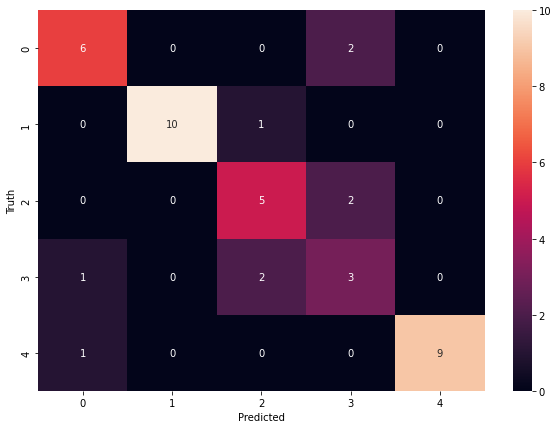

In [84]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [85]:
class_dict


{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [86]:

import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [87]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))